In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [2]:
files = {
    "calendar": "data/calendar.csv",
    "gps_data": "data/gps-data.csv",
    "roster": "data/roster.csv",
    "wellness": "data/wellness.csv"
}

In [3]:
calendar_df = pd.read_csv('data/calendar.csv')
gps_data_df = pd.read_csv('data/gps-data.csv')
roster_df = pd.read_csv('data/roster.csv')
wellness_df = pd.read_csv('data/wellness.csv')

In [4]:
calendar_df.head()

,Date,Day Number,Day,Month,Month Name,Month Number,Year,Season,week of Season,Day Rhythm,Activity
0,8/29/2022,29.0,Monday,Aug,August,8.0,2022.0,2022/23,1.0,MD+2,Training
1,8/30/2022,30.0,Tuesday,Aug,August,8.0,2022.0,2022/23,1.0,MD-4,Training
2,8/31/2022,31.0,Wednesday,Aug,August,8.0,2022.0,2022/23,1.0,MD-3,Training
3,9/1/2022,1.0,Thursday,Sep,September,9.0,2022.0,2022/23,1.0,MD-2,Training
4,9/2/2022,2.0,Friday,Sep,September,9.0,2022.0,2022/23,1.0,MD-1,Training


In [5]:
def clean_data(df):
    # Drop duplicates
    df_cleaned = df.drop_duplicates()
    # Fill missing values with a placeholder or drop rows/columns with too many missing values
    df_cleaned = df_cleaned.dropna(axis=0, how='any')  # Dropping rows with any missing value
    return df_cleaned

In [6]:
calendar= clean_data(calendar_df)
gps_data = clean_data(gps_data_df)
roster = clean_data(roster_df)
wellness = clean_data(wellness_df)

In [7]:
before_columns = {
    "calendar": calendar_df.shape,
    "gps_data": gps_data_df.shape,
    "roster": roster_df.shape,
    "wellness": wellness_df.shape
}

after_columns = {
    "calendar": calendar.shape,
    "gps_data": gps_data.shape,
    "roster": roster.shape,
    "wellness": wellness.shape
}

print("Columns before cleaning:", before_columns)
print("Columns after cleaning:", after_columns)

Columns before cleaning: {'calendar': (35, 11), 'gps_data': (1176, 37), 'roster': (25, 7), 'wellness': (386, 7)}
Columns after cleaning: {'calendar': (33, 11), 'gps_data': (1175, 37), 'roster': (25, 7), 'wellness': (386, 7)}


In [8]:
# Check for date columns in each dataframe and convert them to datetime
def convert_date_columns(df):
    for column in df.columns:
        # Only convert columns with strings in them, which could represent dates
        if df[column].dtype == 'object' and pd.to_datetime(df[column], errors='coerce').notna().all():
            df[column] = pd.to_datetime(df[column], errors='coerce')
    return df

# Convert date columns in all dataframes
calendar = convert_date_columns(calendar)
gps_data = convert_date_columns(gps_data)
roster = convert_date_columns(roster)
wellness = convert_date_columns(wellness)

In [9]:
calendar.dtypes

Date              datetime64[ns]
Day Number               float64
Day                       object
Month                     object
Month Name                object
Month Number             float64
Year                     float64
Season                    object
week of Season           float64
Day Rhythm                object
Activity                  object
dtype: object

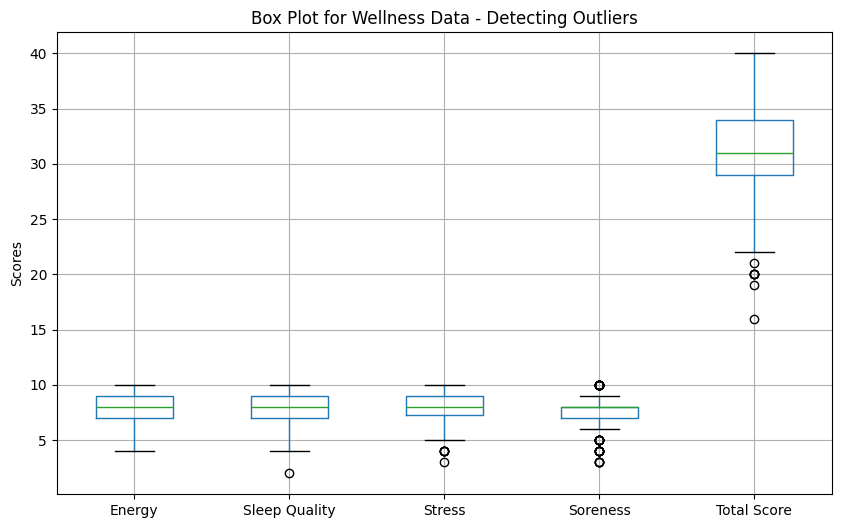

In [10]:
import matplotlib.pyplot as plt
# Select numeric columns for the box plot
numeric_columns_wellness = wellness.select_dtypes(include='number').columns

# Create the box plot
plt.figure(figsize=(10, 6))
wellness[numeric_columns_wellness].boxplot()
plt.title('Box Plot for Wellness Data - Detecting Outliers')
plt.ylabel('Scores')
plt.show()

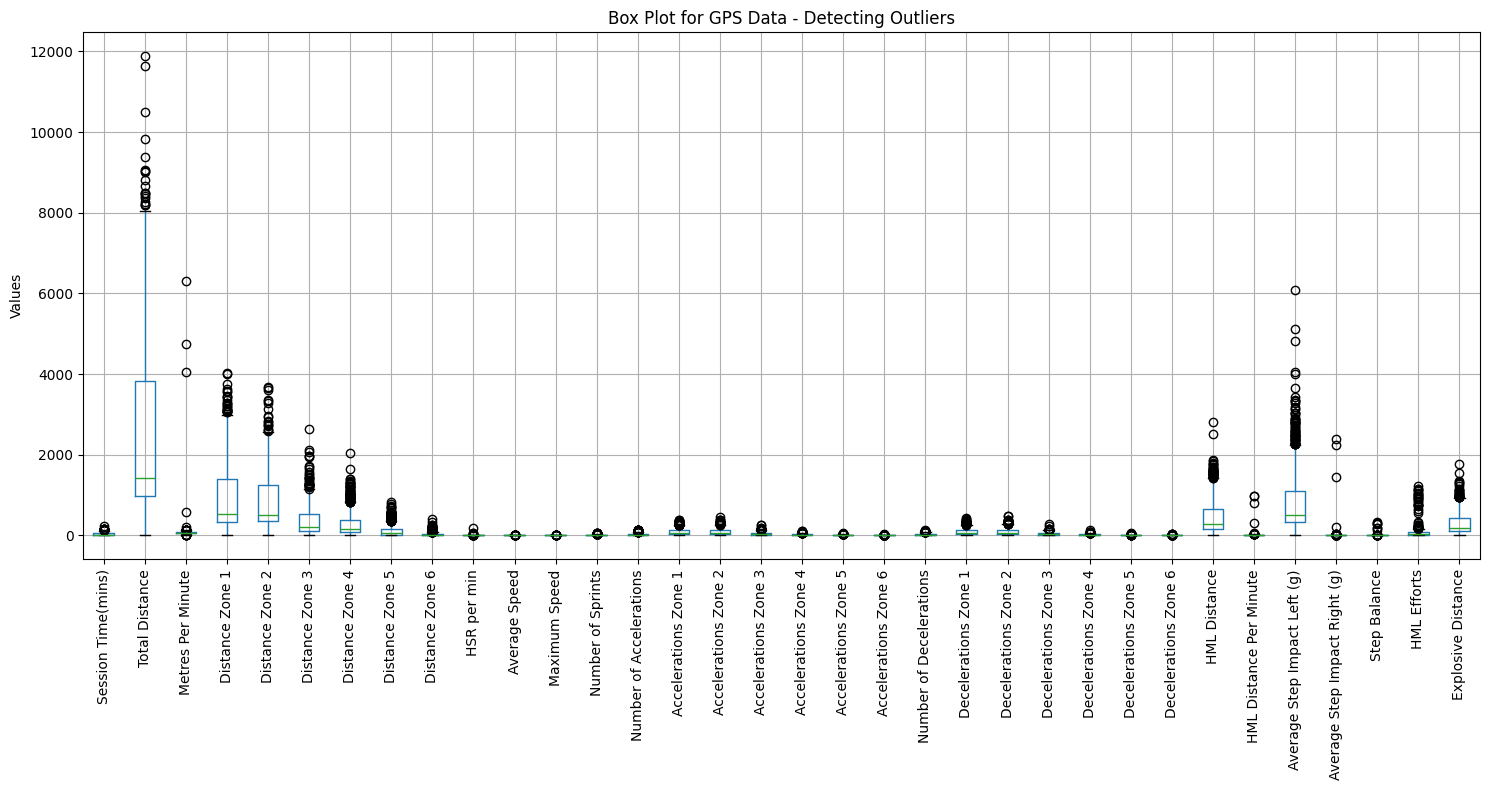

In [11]:
# Select the relevant numeric columns for box plot
selected_columns = [
    'Session Time(mins)', 'Total Distance', 'Metres Per Minute', 'Distance Zone 1', 'Distance Zone 2',
    'Distance Zone 3', 'Distance Zone 4', 'Distance Zone 5', 'Distance Zone 6', 'HSR per min',
    'Average Speed', 'Maximum Speed', 'Number of Sprints', 'Number of Accelerations',
    'Accelerations Zone 1', 'Accelerations Zone 2', 'Accelerations Zone 3', 'Accelerations Zone 4',
    'Accelerations Zone 5', 'Accelerations Zone 6', 'Number of Decelerations', 'Decelerations Zone 1',
    'Decelerations Zone 2', 'Decelerations Zone 3', 'Decelerations Zone 4', 'Decelerations Zone 5',
    'Decelerations Zone 6', 'HML Distance', 'HML Distance Per Minute', 'Average Step Impact Left (g)',
    'Average Step Impact Right (g)', 'Step Balance', 'HML Efforts', 'Explosive Distance'
]

# Create the box plot for the selected columns
plt.figure(figsize=(15, 8))
gps_data[selected_columns].boxplot()
plt.title('Box Plot for GPS Data - Detecting Outliers')
plt.ylabel('Values')
plt.xticks(rotation=90)  # Rotate column names for better readability
plt.tight_layout()  # Adjust layout for better presentation
plt.show()


In [14]:
def remove_outliers(df, columns):
    # For each column, calculate Q1, Q3, and IQR
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier limits
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Remove rows where the column values are outside the limits
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    
    return df

gps_data = remove_outliers(gps_data, selected_columns)

In [17]:
# Saving preprocessed dataframes as new CSV files
calendar.to_csv('data/calendar_preprocessed.csv', index=False)
gps_data.to_csv('data/gps_data_preprocessed.csv', index=False)
roster.to_csv('data/roster_preprocessed.csv', index=False)
wellness.to_csv('data/wellness_preprocessed.csv', index=False)

print("Preprocessed files have been saved.")


Preprocessed files have been saved.
